
# Diabetic Prediction model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Load dataset into a pandas DataFrame

In [2]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

Preprocess the data
Separate features (X) and target (y)

In [3]:
def preprocess_data(data):
    X = data.drop(columns=['Outcome'])
    y = data['Outcome']
    X = X.replace(0, np.nan).fillna(X.mean())
    return X, y

 Handle missing values (if any) by replacing them with column means

Split the data

In [4]:
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

Tune hyperparameters and train the model

In [5]:
def tune_hyperparameters(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

Save the model

In [6]:
def save_model(model, file_path):
    with open(file_path, 'wb') as file:
        pickle.dump(model, file)

Load the saved model

In [7]:
def load_model(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

In [8]:
def predict(model, X):
    return model.predict(X)

Evaluate the model

In [9]:
def evaluate_model(model, X_test, y_test):
    y_pred = predict(model, X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return acc, report, cm

Plot confusion matrix

In [10]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [11]:
dataset_path = 'diabetes.csv'
model_save_path = 'diabetes_model.pkl'
data = load_data(dataset_path)
X, y = preprocess_data(data)
X_train, X_test, y_train, y_test = split_data(X, y)
model = tune_hyperparameters(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_de

In [12]:

save_model(model, model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to diabetes_model.pkl


Evaluate the model

In [13]:
accuracy, report, cm = evaluate_model(model, X_test, y_test)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



Plot confusion matrix

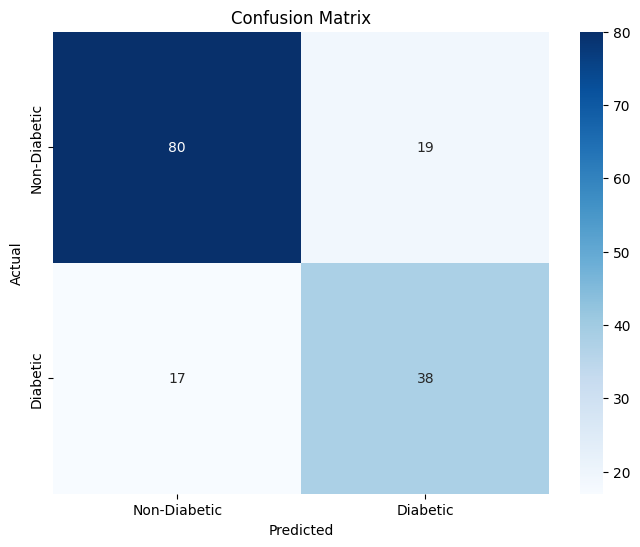

In [14]:
plot_confusion_matrix(cm, labels=['Non-Diabetic', 'Diabetic'])

In [16]:
input_data = input().strip().split('\t')
input_array = np.asarray(input_data, dtype=float)
input_reshaped = input_array.reshape(1, -1)

prediction = predict(loaded_model, input_reshaped)

if prediction[0] == 0:
    print("No Diabetes")
else:
    print("Diabetes")

8	183	64	0	0	23.3	0.672	32
Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Heart Disease Prediction model

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [18]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

In [19]:
def preprocess_data(data):
    X = data.drop(columns=['target'])
    y = data['target']
    X = X.replace(0, np.nan).fillna(X.mean())
    return X, y

In [20]:
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


In [21]:
def tune_hyperparameters(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_


In [22]:
def save_model(model, file_path):
    with open(file_path, 'wb') as file:
        pickle.dump(model, file)

def load_model(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)


def predict(model, X):
    return model.predict(X)

In [23]:
def evaluate_model(model, X_test, y_test):
    y_pred = predict(model, X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return acc, report, cm

In [24]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [25]:
dataset_path = 'heart.csv'
model_save_path = 'heart_disease_model.pkl'
data = load_data(dataset_path)
X, y = preprocess_data(data)
X_train, X_test, y_train, y_test = split_data(X, y)
model = tune_hyperparameters(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_de

In [26]:
save_model(model, model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to heart_disease_model.pkl


In [27]:
accuracy, report, cm = evaluate_model(model, X_test, y_test)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



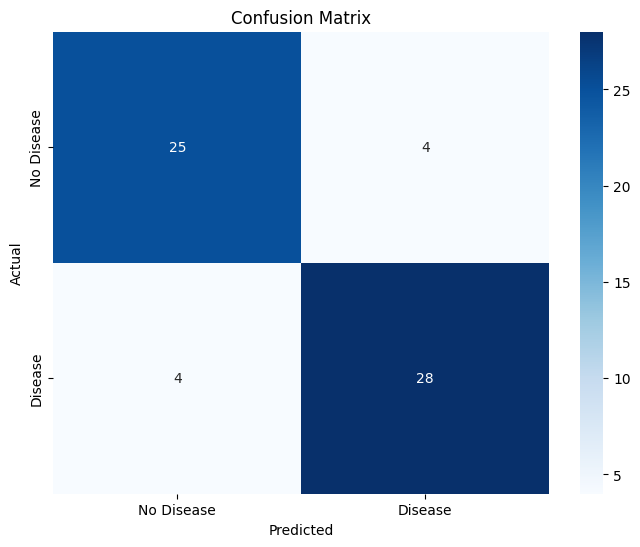

In [28]:
plot_confusion_matrix(cm, labels=['No Disease', 'Disease'])

In [29]:
loaded_model = load_model('heart_disease_model.pkl')

input_data = input().strip().split('\t')
input_array = np.asarray(input_data, dtype=float)
input_reshaped = input_array.reshape(1, -1)

prediction = predict(loaded_model, input_reshaped)

if prediction[0] == 0:
    print("No Heart Disease")
else:
    print("Heart Disease")

44	1	1	120	263	0	1	173	0	0	2	0	3
Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Parkinsons Disease Prediction

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [31]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data


In [32]:

def preprocess_data(data):
    data = data.drop(columns=['name'])
    X = data.drop(columns=['status'])
    y = data['status']
    X = X.replace(0, np.nan).fillna(X.mean())
    return X, y

In [33]:
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [34]:
def tune_hyperparameters(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

In [35]:
def save_model(model, file_path):
    with open(file_path, 'wb') as file:
        pickle.dump(model, file)

def load_model(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

def predict(model, X):
    return model.predict(X)

In [36]:

def evaluate_model(model, X_test, y_test):
    y_pred = predict(model, X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return acc, report, cm

In [37]:

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


In [38]:
dataset_path = 'parkinsons.csv'
model_save_path = 'parkinsons_disease_model.pkl'
data = load_data(dataset_path)
X, y = preprocess_data(data)
X_train, X_test, y_train, y_test = split_data(X, y)
model = tune_hyperparameters(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_de

In [39]:
save_model(model, model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to parkinsons_disease_model.pkl


In [40]:
accuracy, report, cm = evaluate_model(model, X_test, y_test)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9487179487179487
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



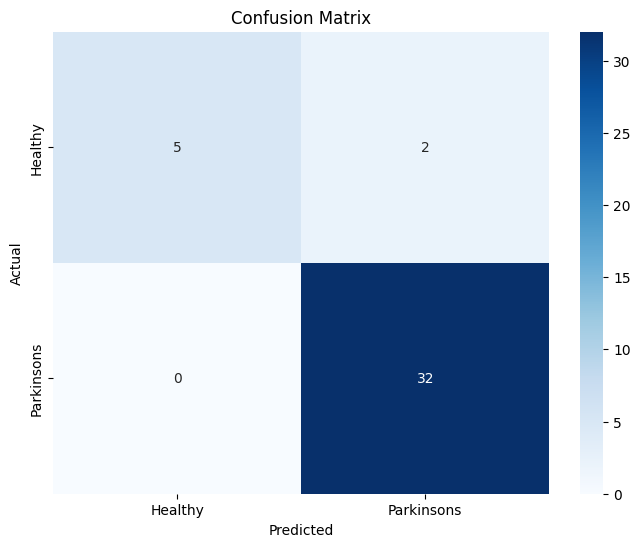

In [41]:
plot_confusion_matrix(cm, labels=['Healthy', 'Parkinsons'])

In [45]:
loaded_model = load_model(model_save_path)
sample_data = np.array([[119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554, 0.01109, 0.04374, 0.426, 0.0202, 0.06425, 0.03517, 0.145, 0.01109, 21.033, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654]])  # Example input
prediction = predict(loaded_model, sample_data)

if prediction[0] == 0:
    print("No Parkinsons Disease")
else:
    print("Parkinsons Disease")

Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
